# Sample API Call

In [6]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
from config import API_KEY

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'25',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': API_KEY,
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2025-02-02T20:19:19.869Z', 'error_code': 0, 'error_message': None, 'elapsed': 18, 'credit_count': 1, 'notice': None, 'total_count': 10808}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11888, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [7]:
type(data)

dict

In [8]:
import pandas as pd

pd.set_option('display.max_columns', None)

In [10]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')

In [12]:
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11888,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.981882e+07,1.981882e+07,False,NaN,1,NaN,NaN,None,2025-02-02T20:18:00.000Z,98430.225991,5.705906e+10,100.3548,1.358299,-2.963287,-6.293808,-0.118567,-0.167239,45.446189,1.950770e+12,59.2815,2.067035e+12,None,2025-02-02T20:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-03 00:19:41.470600
1,1027,Ethereum,ETH,ethereum,9908,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.205231e+08,1.205231e+08,True,NaN,2,NaN,NaN,None,2025-02-02T20:18:00.000Z,2977.520287,3.602715e+10,86.2822,2.477897,-6.434365,-10.761867,-17.453734,-23.139631,22.806600,3.588599e+11,10.9141,3.588599e+11,None,2025-02-02T20:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-03 00:19:41.470600
2,52,XRP,XRP,xrp,1520,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.770373e+10,9.998654e+10,False,NaN,3,NaN,NaN,None,2025-02-02T20:18:00.000Z,2.704190,1.339962e+10,236.5127,5.730796,-7.688874,-13.505998,9.958349,11.336251,433.525405,1.560419e+11,4.7419,2.704190e+11,None,2025-02-02T20:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-03 00:19:41.470600
3,825,Tether USDt,USDT,tether,115327,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,1.394042e+11,1.425729e+11,True,NaN,4,NaN,NaN,None,2025-02-02T20:18:00.000Z,0.999774,1.324794e+11,88.6978,0.057940,-0.007152,-0.000862,0.008069,-0.160334,0.040392,1.393727e+11,4.2388,1.425406e+11,None,2025-02-02T20:18:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-02-03 00:19:41.470600
4,5426,Solana,SOL,solana,835,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.869806e+08,5.932640e+08,True,NaN,5,NaN,NaN,None,2025-02-02T20:18:00.000Z,205.499578,7.380594e+09,140.7429,4.649802,-6.533070,-19.566530,-5.101190,-12.356746,29.024262,1.000743e+11,3.0411,1.219155e+11,None,2025-02-02T20:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-03 00:19:41.470600


# Automated Data Pull

In [1]:
import os
import pandas as pd
from time import time
from time import sleep
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
from config import API_KEY

In [2]:
def api_call(url, parameters,headers):
  session = Session()
  session.headers.update(headers)
  try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
    return data
  except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)

In [3]:
def extract_data(data):
  df = pd.json_normalize(data['data'])
  df['timestamp'] = pd.to_datetime('now')
  return df

In [4]:
def time_series_call(url, parameters,headers, iterations, sleep_time):
    df_list = []  
    for _ in range(iterations):
        data = api_call(url, parameters,headers)  
        extracted_df = extract_data(data) 
        df_list.append(extracted_df) 
        print('Data extracted at:', pd.to_datetime('now'))
        sleep(sleep_time)

    df = pd.concat(df_list, ignore_index=True)
    return df


In [5]:
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'25',
  'convert':'USD'
}

headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': API_KEY,
}

In [6]:
crypto_data = time_series_call(url, parameters,headers, 5, 10)

Data extracted at: 2025-02-06 23:23:15.061872
Data extracted at: 2025-02-06 23:23:25.695098
Data extracted at: 2025-02-06 23:23:36.326737
Data extracted at: 2025-02-06 23:23:46.963534
Data extracted at: 2025-02-06 23:23:57.950113


In [7]:
crypto_data.tail()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
120,2,Litecoin,LTC,litecoin,1314,2013-04-28T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, he...",84000000.0,7.550350e+07,8.400000e+07,...,0.2438,8.529257e+09,None,2025-02-06T19:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-06 23:23:57.948144
121,6636,Polkadot,DOT,polkadot-new,865,2020-08-19T00:00:00.000Z,"[substrate, polkadot, polkadot-ecosystem, thre...",NaN,1.546180e+09,1.546180e+09,...,0.2236,7.045569e+09,None,2025-02-06T19:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-06 23:23:57.948144
122,1831,Bitcoin Cash,BCH,bitcoin-cash,976,2017-07-23T00:00:00.000Z,"[mineable, pow, sha-256, marketplace, medium-o...",21000000.0,1.982563e+07,1.982563e+07,...,0.2008,6.703559e+09,None,2025-02-06T19:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-06 23:23:57.948144
123,29470,Ethena USDe,USDe,ethena-usde,104,2024-02-20T11:05:01.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,6.049693e+09,6.049693e+09,...,0.1924,6.051288e+09,None,2025-02-06T19:22:00.000Z,1027.0,Ethereum,ETH,ethereum,0x4c9edd5852cd905f086c759e8383e09bff1e68b3,2025-02-06 23:23:57.948144
124,6536,MANTRA,OM,mantra,242,2020-08-11T00:00:00.000Z,"[cosmos-ecosystem, defi, dao, ethereum-ecosyst...",NaN,9.712344e+08,1.806767e+09,...,0.1823,1.066488e+10,None,2025-02-06T19:22:00.000Z,1027.0,Ethereum,ETH,ethereum,0x3593d125a4f7849a1b059e64f4517a86dd60c95d,2025-02-06 23:23:57.948144


# Conversion to CSV file

In [14]:
if not os.path.exists('crypto_data.csv'):
    crypto_data.to_csv('crypto_data.csv', index=False)

# Transforming the data

In [8]:
crypto_data.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11928,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.982058e+07,1.982058e+07,...,60.9040,2.033071e+12,None,2025-02-06T19:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-06 23:23:15.052009
1,1027,Ethereum,ETH,ethereum,9919,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.205286e+08,1.205286e+08,...,10.3977,3.277412e+11,None,2025-02-06T19:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-06 23:23:15.052009
2,825,Tether USDt,USDT,tether,115705,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,1.411669e+11,1.435706e+11,...,4.4903,1.435998e+11,None,2025-02-06T19:22:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-02-06 23:23:15.052009
3,52,XRP,XRP,xrp,1525,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.770373e+10,9.998654e+10,...,4.2789,2.331725e+11,None,2025-02-06T19:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-06 23:23:15.052009
4,5426,Solana,SOL,solana,837,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.871553e+08,5.935307e+08,...,2.9584,1.136137e+11,None,2025-02-06T19:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-06 23:23:15.052009


In [9]:
crypto_data.columns

Index(['id', 'name', 'symbol', 'slug', 'num_market_pairs', 'date_added',
       'tags', 'max_supply', 'circulating_supply', 'total_supply',
       'infinite_supply', 'platform', 'cmc_rank',
       'self_reported_circulating_supply', 'self_reported_market_cap',
       'tvl_ratio', 'last_updated', 'quote.USD.price', 'quote.USD.volume_24h',
       'quote.USD.volume_change_24h', 'quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d', 'quote.USD.market_cap',
       'quote.USD.market_cap_dominance', 'quote.USD.fully_diluted_market_cap',
       'quote.USD.tvl', 'quote.USD.last_updated', 'platform.id',
       'platform.name', 'platform.symbol', 'platform.slug',
       'platform.token_address', 'timestamp'],
      dtype='object')

In [10]:
grouped_data = crypto_data.groupby('name',sort=False)[['quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d']].mean()

In [11]:
grouped_data

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.458152,-0.110560,-8.143275,-0.063424,-2.796019,25.804384
Ethereum,0.589435,-0.996237,-16.741283,-20.494481,-31.543015,-8.228247
Tether USDt,-0.004503,0.041318,0.005544,0.052342,-0.020826,-0.079578
XRP,0.256231,-2.779326,-25.647956,1.929447,-10.095718,324.018988
Solana,0.423359,-3.364615,-20.216015,-6.587711,-18.433371,-4.755846
BNB,0.251265,2.217454,-14.911378,-16.806288,-21.395297,-3.160938
USDC,-0.061189,0.015036,-0.013014,-0.013437,0.009649,0.017325
Dogecoin,-0.068617,-3.470368,-25.765176,-30.053187,-46.426916,26.525529
Cardano,-0.151047,-3.528707,-26.147274,-29.560997,-39.609497,59.784722


In [12]:
stacked_data = grouped_data.stack().reset_index()

In [14]:
stacked_data.columns = ['name', 'time_period', 'percent_change']

In [15]:
stacked_data

,name,time_period,percent_change
0,Bitcoin,quote.USD.percent_change_1h,0.458152
1,Bitcoin,quote.USD.percent_change_24h,-0.110560
2,Bitcoin,quote.USD.percent_change_7d,-8.143275
3,Bitcoin,quote.USD.percent_change_30d,-0.063424
4,Bitcoin,quote.USD.percent_change_60d,-2.796019
...,...,...,...
145,MANTRA,quote.USD.percent_change_24h,1.628090
146,MANTRA,quote.USD.percent_change_7d,3.142429
147,MANTRA,quote.USD.percent_change_30d,53.613462
148,MANTRA,quote.USD.percent_change_60d,47.290127


In [23]:
stacked_data['time_period'] = stacked_data['time_period'].str.replace('quote.USD.percent_change_','')

In [24]:
stacked_data

,name,time_period,percent_change
0,Bitcoin,1h,0.458152
1,Bitcoin,24h,-0.110560
2,Bitcoin,7d,-8.143275
3,Bitcoin,30d,-0.063424
4,Bitcoin,60d,-2.796019
...,...,...,...
145,MANTRA,24h,1.628090
146,MANTRA,7d,3.142429
147,MANTRA,30d,53.613462
148,MANTRA,60d,47.290127


# Visualizing the data

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

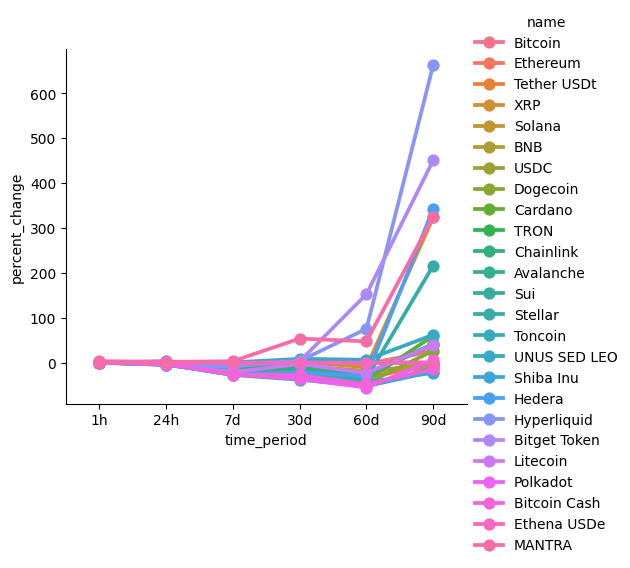

In [25]:
sns.catplot(data=stacked_data, x='time_period', y='percent_change', hue='name', kind='point')